<a href="https://colab.research.google.com/github/frnk-pchc/CTelecomX/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####ETL de la DF de Telecomunicaciones

---



##Extracción de Datos

#####Bibliotecas a emplear

In [26]:
import pandas as pd
import requests
import json
import numpy as np


##### Datos desde la API

In [27]:
# Obteniendo datos desde la API

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)


#### Visualizacion inicial

Primeros Registros

In [28]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Ultimos Registros

In [29]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Informacion sobre el Data Frame

In [30]:

print('Información de las Columnas')
df.info()

print(' ')
print("Registros y columnas del Data Frame")
df.shape


Información de las Columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
 
Registros y columnas del Data Frame


(7267, 6)

Normalizar columnas anidadas





#####Normalizacion de las columnas anidadas

In [31]:
# Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

#Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

#Verificar los cambios
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


df.columns

##### Verificando nombres de Columnas

In [14]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#####Renombrar las columnas para que tengan significado, revisión de cambios

---



In [33]:
df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)



#####Nombres de Columnas actualizados


In [34]:
df.head()


,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
###Ajustando el contenido de los datos

#####Detectar valores ausentes


In [35]:
df.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


#####Detectar valores ausentes

In [36]:
df.isnull().sum()


,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


#####Detectar Strings vacíos

In [37]:
(df['cancelo'] == '').sum()

np.int64(224)

In [38]:
(df['gastos_totales'] == ' ').sum()


np.int64(11)

#####Reemplazar los strings vacíos por NaN

In [41]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)


Verificacion de que no quedan string vacios

In [42]:
(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

np.int64(0)

In [43]:
df.isnull().sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


#####Eliminar las filas con NaN

In [44]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [45]:
df[['cancelo', 'gastos_totales']].isnull().sum()

,0
cancelo,0
gastos_totales,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   mayor_de_65              7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependentes        7032 non-null   object 
 6   meses_contrato           7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   object 
 11  Soporte_en_linea         7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  servicio_tv              7032

Visualizacion de la DF

In [47]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#####Corrección de tipos de datos

In [48]:
# Convertir a float
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

In [50]:

# Convertir a variables String
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

# Variables a string
df[vars_a_str] = df[vars_a_str].astype(str)

In [51]:
# variable que incluira las variables que van a ser convertidas a booleanas

columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

/tmp/ipython-input-2413125524.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [53]:
# Transformación de variables a categoricas

columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

Visualizar cambios

In [54]:
df.head()


,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


#####Verificar y Eliminar duplicados

In [55]:

df.duplicated().sum()

np.int64(0)

#####Crear Columna de cuentas diarias

In [56]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [57]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


Verificando la nueva variable

In [58]:
df.columns

Index(['ID', 'cancelo', 'genero', 'mayor_de_65', 'tiene_pareja',
       'tiene_dependentes', 'meses_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico',
       'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
       'facturas_electronicas', 'metodo_pago', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias'],
      dtype='object')

#####Estandarización y transformación de datos

In [59]:
df[columnas_bool] = df[columnas_bool].astype(int)



In [60]:
df[columnas_bool].head()


,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,facturas_electronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   cancelo                  7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   mayor_de_65              7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependentes        7032 non-null   int64   
 6   meses_contrato           7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   servicio_internet        7032 non-null   object  
 10  seguridad_en_linea       7032 non-null   category
 11  Soporte_en_linea         7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  servicio_tv  

In [62]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [63]:
df.dtypes


,0
ID,object
cancelo,int64
genero,object
mayor_de_65,int64
tiene_pareja,int64
tiene_dependentes,int64
meses_contrato,int64
servicio_telefonico,object
lineas_multiples,category
servicio_internet,object


###Carga y Análisis

#####Análisis Descriptivo

In [64]:
df.describe()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


#####Conteo de evasión por variables categóricas

In [65]:
columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'genero',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_en_linea',
 'Soporte_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'servicio_tv',
 'servicio_peliculas',
 'tipo_contrato',
 'metodo_pago']

In [66]:
# Conteos cruzados con cancelo

for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))



--- Porcentaje de evasión por ID ---
cancelo         0      1
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

--- Porcentaje de evasión por genero ---
cancelo      0      1
genero               
Female   73.04  26.96
Male     73.80  26.20

--- Porcentaje de evasión por servicio_telefonico ---
cancelo                  0      1
servicio_telefonico              
No                   75.00  25.00
Yes                  73.25  26.75

--- Porcentaje de evasión por lineas_multiples ---
cancelo               0      1
lineas_multiples              
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

--- Porcentaje de evasión por servicio_internet ---
cancelo                0      1

#####Distribución de Evasión

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Esquema de Colores
AZUL = '#00509E'         # azul corporativo
VERDE = '#66BB6A'        # verde corporativo
GRIS = '#7D7D7D'         # gris para títulos

In [70]:
def cancelacion_tipo_internet():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('servicio_internet')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='servicio_internet',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (sin palette -> sin warning)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de Internet', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 11
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=11, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.tight_layout()



  return plt

In [71]:
def cancelacion_tipo_contrato():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('tipo_contrato')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='tipo_contrato',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (alternancia azul/verde)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de contrato', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Fondo gris
  ax.set_facecolor('#f0f0f0')  # Fondo
  plt.gcf().set_facecolor('#f0f0f0')  # Fondo de la figura

  plt.tight_layout()

  return plt

In [72]:
def cancelacion_servicios_adicionales():

  # Lista de servicios adicionales
  servicios = ['seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
  titulos = ['Seguridad en línea', 'Soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

  # Orden lógico de categorías
  orden = ['No', 'Yes', 'No internet service']

  # Crear figura y ejes
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Cancelación según servicios adicionales', fontsize=20, color=GRIS)
  fig.patch.set_facecolor('#f0f0f0')  # fondo de la figura

  # Gráficas
  for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
      fila = i // 2
      col = i % 2
      ax = axs[fila, col]
      ax.set_facecolor('#f0f0f0')  # fondo del gráfico individual

      # Gráfica de barras sin usar hue
      plot = sns.barplot(
      x=servicio,
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None,
      hue=servicio,           # agregamos hue (aunque no usaremos leyenda)
      legend=False,           # ocultamos leyenda
      ax=ax,
      palette=[AZUL, VERDE, AZUL]
  )


      # Título
      ax.set_title(titulo, fontsize=16, color=GRIS)

      # Etiqueta del eje Y solo en la primera columna
      if col == 0:
          ax.set_ylabel('')
          ax.set_yticklabels([])  # suprimir etiquetas y
          ax.tick_params(axis='y', length=0)  # sin ticks eje y
      else:
          ax.set_ylabel('')
          ax.set_yticklabels([])
          ax.tick_params(axis='y', length=0)

      # Eje X
      ax.set_xlabel('')
      ax.tick_params(axis='x', labelsize=12, colors=AZUL)

      # Bordes
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

      # Rango común para comparar
      ax.set_ylim(0, 50)

      # Etiquetas sobre las barras
      for container in ax.containers:
          ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # para que el título no se encime

  return plt




In [73]:
#Conteos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependentes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo          0      1
mayor_de_65              
0            76.35  23.65
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo           0      1
tiene_pareja              
0             67.02  32.98
1             80.28  19.72

--- Porcentaje de evasión por tiene_dependentes ---
cancelo                0      1
tiene_dependentes              
0                  68.72  31.28
1                  84.47  15.53


In [74]:
def cancelacion_bin():

  plt.figure(figsize=(14, 4))


  for i, var in enumerate(variables_binarias):
      plt.subplot(1, 4, i+1)

      # Calcular porcentaje de cancelación
      data = df.groupby(var)['cancelo'].mean() * 100
      categorias = data.index
      valores = data.values

      # Convertimos a DataFrame para usar x=hue
      temp_df = pd.DataFrame({var: categorias, 'cancelacion': valores})

      # Gráfico de barras con colores alternos
      sns.barplot(
          data=temp_df,
          x=var,
          y='cancelacion',
          hue=var,
          palette=[AZUL, VERDE],
          legend=False
      )

      # Texto sobre las barras
      for j, v in enumerate(valores):
          plt.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=AZUL)

      # Limites y personalización
      plt.ylim(0, 100)
      plt.title(var.replace('_', ' ').capitalize(), fontsize=16, )

      # Eje Y sin etiquetas ni ylabel
      plt.tick_params(axis='y', labelleft=False)
      plt.ylabel('')

      # Eje X personalizado
      plt.xlabel('')
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()

  return plt

#####Conteo de evasión por variables numéricas

In [75]:
# Variables numericas

columnas_numericas = [['gastos_mensuales','gastos_totales','cuentas_diarias']]

# Promedios y desviaciones agrupadas
df.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']].agg(['mean', 'std'])

gastos_mensuales            gastos_totales               \
                    mean        std           mean          std   
cancelo                                                           
0              61.307408  31.094557    2555.344141  2329.456984   
1              74.441332  24.666053    1531.796094  1890.822994   

        cuentas_diarias            
                   mean       std  
cancelo                            
0              2.043580  1.036485  
1              2.481378  0.822202

In [76]:
print(columnas_numericas)
print(type(columnas_numericas))

[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']]
<class 'list'>


In [77]:
columnas_numericas = columnas_numericas[0]

In [78]:

def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, col in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelo',
      y=col,
      hue='cancelo',
      data=df,
      showfliers=False,
      palette=[AZUL, VERDE],
      legend=False
     )



      # Título en GRIS
      plt.title(f'{col.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=AZUL)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eje Y
      plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=12, color=AZUL)
      plt.tick_params(axis='y', labelsize=12, colors=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt

In [86]:
def cancelacion_segun_meses():

  # Boxplot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelo', y='meses_de_contrato', data=df, showfliers=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Canceló')
  plt.ylabel('Meses de contrato')

  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

#Informe final

---



Este informe establece cuales son los factores más relevantes relacionadaso con la cancelación de sus servicios de la empresa Telecom X, por medio de la ciencia de datos, se procura establecer las causas, para que puedan a partir de eso, establecer las estrategias adecuadas.
🔹 Limpieza y Tratamiento de Datos:
La limpieza y tratamiento de datos, incluyo el detectar aquellas informaciones faltantes, incompletas o nulas, reemplazar según sea el caso, también el renombrar las variables para que tuvieran significado para el análisis de los datos. También se crearon nuevas columnas, para facilitar el procesamiento de la información.



🔹 Análisis Exploratorio de Datos:

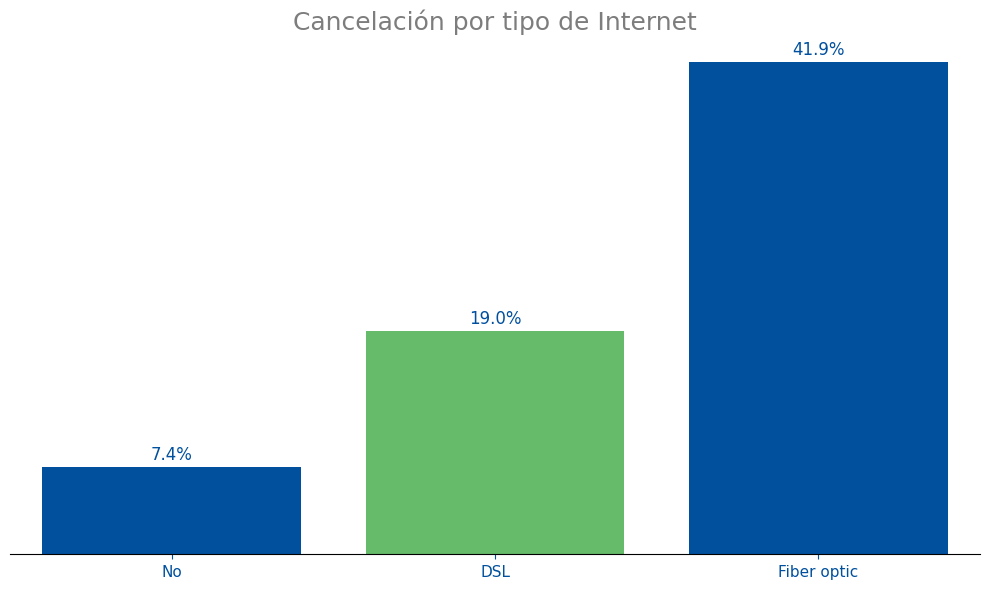

In [80]:
cancelacion_tipo_internet().show()

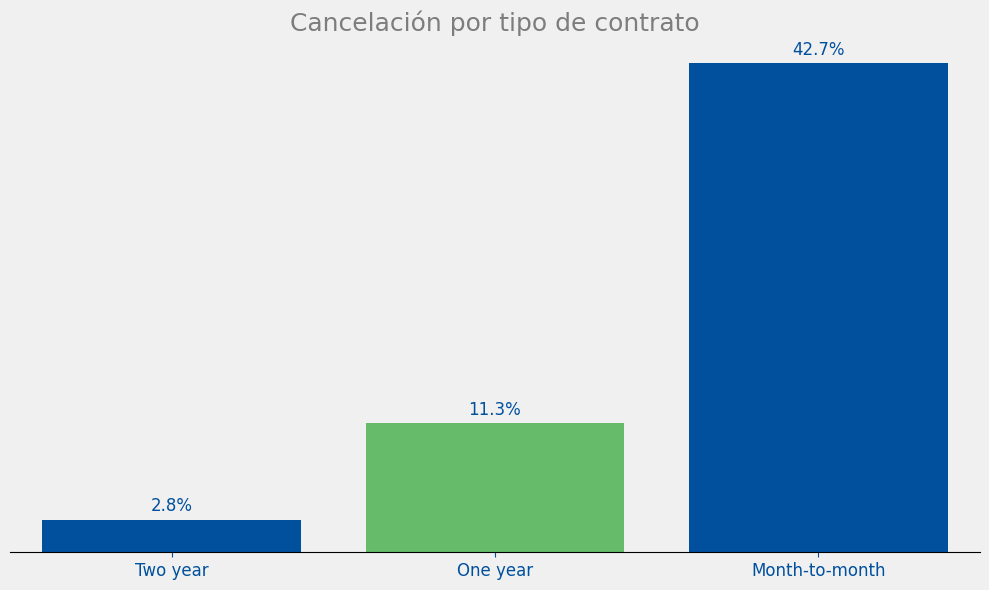

In [81]:
 cancelacion_tipo_contrato().show()

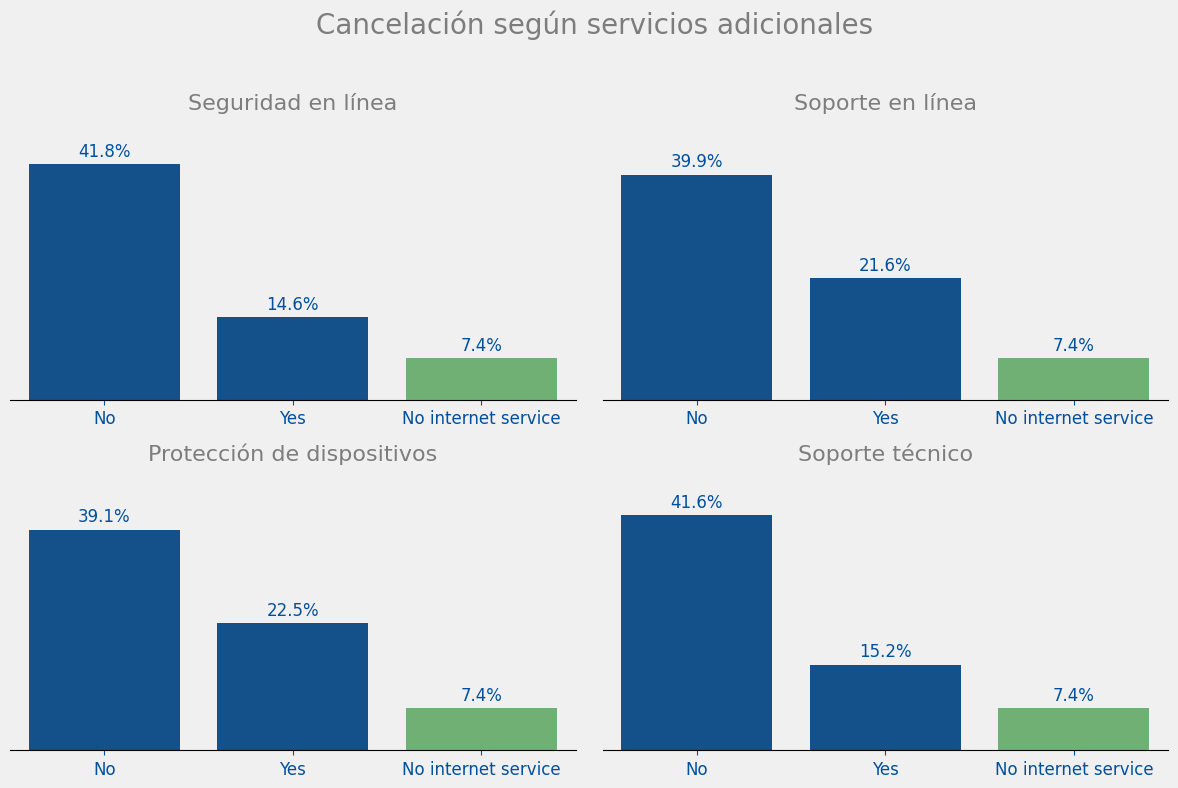

In [82]:
cancelacion_servicios_adicionales().show()

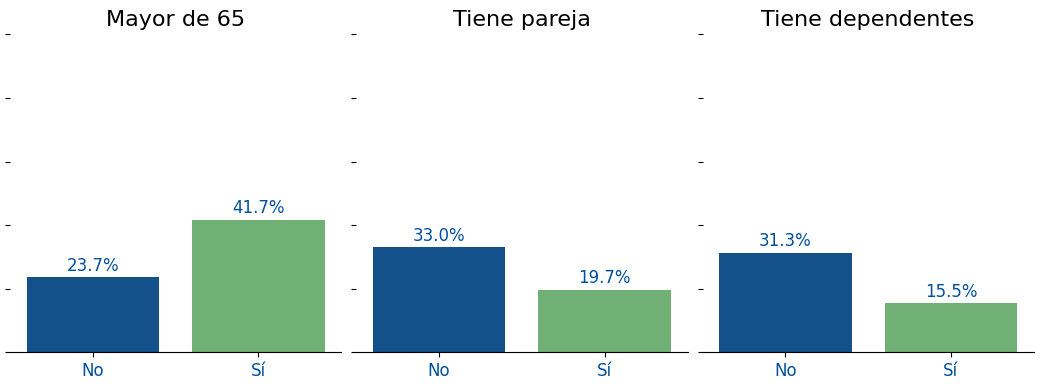

In [83]:
cancelacion_bin().show()

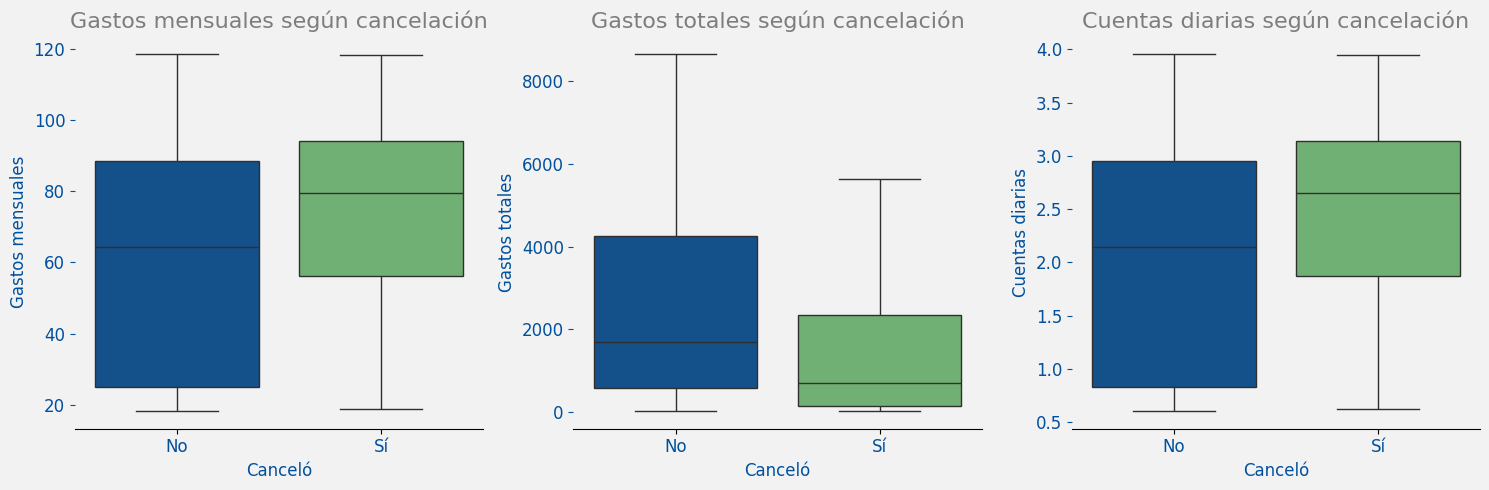

In [84]:
boxplot_cancelacion(columnas_numericas).show()


####Principales hallazgos

Lo relevante es que el tipo de contrato corto, también por su objetivo es un contrato de muy corta duración, habrá que replantearse si va en este informe con los demás casos, pues demanda un enfoque diferente.

Fibra óptica: Mayor tasa de cancelación (41.9%).
Contratos mensuales: Más propensos a cancelar (42.7%).
Sin servicios adicionales: Alta cancelación (alrededor de 40% en seguridad, soporte y protección).
Adultos mayores (65+): Cancelan más (41.7%).
Estado civil: Solteros cancelan más (~33%).

Sin dependientes: Cancelación más alta (31.3%).
Mayor gasto mensual: Más probabilidad de evasión.
Clientes nuevos: Cancelan más, con menor facturación total.
Mayor uso no garantiza fidelidad: Uso activo pero con insatisfacción.
Contratos cortos (~10 meses): Asociados a mayor cancelación.

####Estrategias para reducir la cancelación
---

Fibra óptica: Revisar fallas técnicas, ofrecer alternativas de conexión.

Contratos más largos: Incentivos y promociones sin cláusulas rígidas.

Servicios adicionales incluidos: Paquetes con soporte, seguridad y protección sin recargo.

Adultos mayores: Ofertas personalizadas (contenidos afines, soporte preferente).

Clientes solteros o sin dependientes: Promociones específicas y beneficios adicionales.

Altos costos: Tarifas flexibles, pagos quincenales o personalizados.

Nuevos clientes: Programa de bienvenida y encuestas tempranas de satisfacción.

Contratos mensuales: Incentivos para migrar a contratos más largos y sistema de recompensas.

Segmentación por perfil: Adaptar ofertas según edad, estilo de vida y necesidades.

Monitoreo de uso: Detectar patrones previos a la cancelación para actuar preventivamente.

Unidad de análisis: Seguimiento mensual de métricas y tendencias de evasión.

En síntesis: la cancelación se concentra en clientes con contratos cortos, mayores costos, poca antigüedad y sin servicios adicionales. La solución pasa por mejorar la propuesta de valor, personalizar ofertas según perfil y anticiparse a señales de abandono.